<b> <h1> <font color='darkblue'> DRIVER ASSISTANCE SYSTEM USING CONVOLUTION NEURAL NETWORK </font> </h1> </b>

# **Import Statement**

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers,optimizers

# **Problem Statement**

Driver's negligence has  lead to many accidents around the world in recent years.According to the National Highway Traffic Safety Administration,every year about **100,000** police reported crashes involve drowsy driving and around **1,550** fatal ones.An estimated 16.5% of fatal crashes,13.1% of crashes results in hospitalization and 7% of all the crashes them are related to Drownsy. Car Safety Technolgy can be used to detect distraction and drowsiness which will prevent accidents by warning the driver either to focus on the road or take a break in case of drowsiness or fatigue. 

Dataset is given provided is kaggle which can be accessed by clicking [here](https://www.kaggle.com/dheerajperumandla/drowsiness-dataset).



# Data Formatting

 - #### X(Dataset with Images)
 - #### Y_label(Labels for the Images)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_zip = '/content/drive/MyDrive/Project/train.zip'
with ZipFile(img_zip,'r') as z:
    print('Extracting all the image')
    z.extractall()

Extracting all the image


In [ ]:
X =[]
for path in z.namelist():
    if path == 'train/no_yawn/' or path == 'train/Distracton/' or path == 'train/Closed/'  or path == 'train/Open/' or path == 'train/yawn/':
        pass
    else:
        X.append(path)

In [ ]:
# Number of image in the dataset
len(X)

250

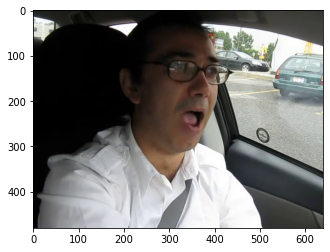

In [ ]:
# Ploting a certain image from the dataset
figure = plt.imread(X[201])
plt.imshow(figure)
plt.show()

In [ ]:
#Converting the images into the array and getting image to same shape
for i, f in enumerate(X):
    img = cv2.imread(f) # open the image path
    img = cv2.resize(img,dsize=(128,128))
    im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X[i] = np.array(im_rgb)
X = np.array(X)

In [ ]:
# Normalize the data
X = X.astype('float32')
X = X/255.

In [ ]:
print(f'Shape of X is {X.shape}')

Shape of X is (250, 128, 128, 3)


In [ ]:
# Exporting the Y-label file
df = pd.read_csv('/content/drive/MyDrive/Project/ytrain.csv', names=['Label'])
y_label = np.array(df)
print(df['Label'].unique())
print(f'Shape of Y-label is {y_label.shape}')

['Closed' 'Distracton' 'No_Yawn' 'Open' 'Yawn']
Shape of Y-label is (250, 1)


In [ ]:
# Coverting categorically variable into Numerical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_label = le.fit_transform(y_label)

In [ ]:
# Converting the class vectors (integers) to binary class matrix
import tensorflow as tf
y_label = tf.keras.utils.to_categorical(y_label,num_classes=5)
print(f'Shape of y_class{y_label.shape}')
print(f'One value of y_class{y_label[0]}')

Shape of y_class(250, 5)
One value of y_class[1. 0. 0. 0. 0.]


# **Data Augmentation**


Slightly modifying of already existing data to create synthetic data .It used to regularize the data and it also helps to reduce overfitting.


In [ ]:
# Slpitting the X and Y label to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y_label, test_size=0.3, random_state=42)
print(f'Shape of X_train:{X_train.shape}')
print(f'Shape of y_train:{y_train.shape}')
print(f'Shape of X_test:{X_test.shape}')
print(f'Shape of y_test:{y_test.shape}')

Shape of X_train:(175, 128, 128, 3)
Shape of y_train:(175, 5)
Shape of X_test:(75, 128, 128, 3)
Shape of y_test:(75, 5)


label for each of the below image: 1
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 1
label for each of the below image: 1
label for each of the below image: 0
label for each of the below image: 1
label for each of the below image: 3
label for each of the below image: 4
label for each of the below image: 3


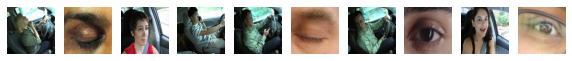

In [ ]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(y_train[0:10][i])))
plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, shuffle=False)
test_generator = test_datagen.flow(X_test, y_test, shuffle=False)

# **Model Building**




### **Base Model**

In [ ]:
# Adding Callback
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

keras_callbacks=[EarlyStopping(monitor='val_loss',patience=10,
                               mode='min',min_delta=0.01)]

In [ ]:
c2=Sequential()
c2.add(Conv2D(256,(3,3),activation='relu',input_shape=X_train.shape[1:]))
c2.add(MaxPooling2D(pool_size=(2,2)))

c2.add(Conv2D(128,(3,3),activation='relu'))
c2.add(MaxPooling2D(pool_size=(2,2)))


c2.add(Conv2D(64,(3,3),activation='relu'))
c2.add(MaxPooling2D(pool_size=(2,2)))


c2.add(Conv2D(32,(3,3),activation='relu'))
c2.add(MaxPooling2D(pool_size=(2,2)))

c2.add(Flatten())


c2.add(Dense(units=32,activation='relu'))
c2.add(Dense(units=5,activation='softmax'))

In [ ]:
c2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
base_model = c2.fit(train_generator, epochs=50, validation_data=test_generator, validation_steps=len(test_generator))

Epoch 1/50
6/6 [==============================] - 1s 154ms/step - loss: 1.6101 - accuracy: 0.2114 - val_loss: 1.6104 - val_accuracy: 0.1467
Epoch 2/50
6/6 [==============================] - 1s 121ms/step - loss: 1.6094 - accuracy: 0.2229 - val_loss: 1.6117 - val_accuracy: 0.1467
Epoch 3/50
6/6 [==============================] - 1s 121ms/step - loss: 1.6087 - accuracy: 0.2229 - val_loss: 1.6145 - val_accuracy: 0.1467
Epoch 4/50
6/6 [==============================] - 1s 127ms/step - loss: 1.6097 - accuracy: 0.2229 - val_loss: 1.6196 - val_accuracy: 0.1467
Epoch 5/50
6/6 [==============================] - 1s 136ms/step - loss: 1.6092 - accuracy: 0.2229 - val_loss: 1.6190 - val_accuracy: 0.1467
Epoch 6/50
6/6 [==============================] - 1s 123ms/step - loss: 1.6089 - accuracy: 0.2229 - val_loss: 1.6139 - val_accuracy: 0.1467
Epoch 7/50
6/6 [==============================] - 1s 120ms/step - loss: 1.6080 - accuracy: 0.2229 - val_loss: 1.6143 - val_accuracy: 0.1467
Epoch 8/50
6/6 [====

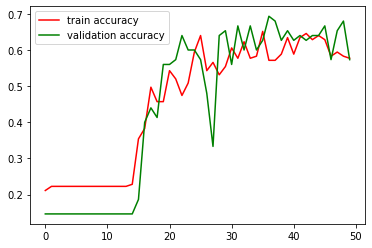

In [ ]:
plt.plot(base_model.history['accuracy'],'r',label='train accuracy')
plt.plot(base_model.history['val_accuracy'],'g',label='validation accuracy')
plt.legend()

In [ ]:
base_train = base_model.history['accuracy']
base_test = base_model.history['val_accuracy']

In [ ]:
score_card = pd.DataFrame(columns=['Model_Name','Train_Accuracy','Train_Loss','Validation_Accuracy','Validation_Loss'])

In [ ]:
score = pd.Series({'Model_Name':'Base','Train_Accuracy':base_model.history['accuracy'][-1],'Train_Loss':base_model.history['loss'][-1],'Validation_Accuracy':base_model.history['val_accuracy'][-1],'Validation_Loss':base_model.history['val_loss'][-1]})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Train_Accuracy,Train_Loss,Validation_Accuracy,Validation_Loss
0,Base,0.577143,0.965051,0.573333,0.723501


- There is no overfitting for this model. However, the accuracy is very low

### **Fine Tuning Base Model**

In [ ]:
def tune_model(learning_rate, dropout_rate,initializer,num_unit):
    model = Sequential()
    model.add(Conv2D(num_unit,(3,3),activation='relu',input_shape=X_train.shape[1:]))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(num_unit,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(num_unit,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(num_unit,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_unit, kernel_initializer=initializer,activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_unit, kernel_initializer=initializer,activation='relu'))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(5, activation='softmax'))
    sgd = optimizers.SGD(lr=learning_rate,decay=1e-6, momentum=0.9)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

In [ ]:
batch_size = [32, 50, 100][:1]
epochs = [1, 20, 50][2:3]
learning_rate = [0.1, 0.001, 0.02]
dropout_rate = [0.3, 0.2]
num_unit = [16,32,64,128]
initializer = ['lecun_uniform', 'normal', 'he_normal', 'he_uniform'][:1]

In [ ]:
parameters = dict(batch_size = batch_size,
                  epochs = epochs,
                  learning_rate=learning_rate,
                  dropout_rate = dropout_rate,
                  num_unit = num_unit,
                  initializer = initializer,
                  )

In [ ]:
print(parameters)

{'batch_size': [32], 'epochs': [50], 'learning_rate': [0.1, 0.001, 0.02], 'dropout_rate': [0.3, 0.2], 'num_unit': [16, 32, 64, 128], 'initializer': ['lecun_uniform']}


In [ ]:
model =tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=tune_model, verbose=0)

In [ ]:
from sklearn.model_selection import GridSearchCV
models = GridSearchCV(estimator = model, param_grid=parameters, n_jobs=1)

In [ ]:
fine_tune_model = models.fit(X_train, y_train)
print('Base model with fine-tuned Parameter :',fine_tune_model.best_params_)

Base model with fine-tuned Parameter : {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 50, 'initializer': 'lecun_uniform', 'learning_rate': 0.02, 'num_unit': 64}


tunned parameters - 'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 50, 'initializer': 'lecun_uniform', 'learning_rate': 0.02, 'num_unit': 64

In [ ]:
tune_model = tune_model(learning_rate=0.02, dropout_rate=0.2,initializer='lecun_uniform',num_unit=64)

In [ ]:
my_mod = tune_model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),batch_size=32,callbacks=keras_callbacks)

Epoch 1/50
6/6 [==============================] - 1s 115ms/step - loss: 1.6008 - accuracy: 0.2743 - val_loss: 1.5931 - val_accuracy: 0.1467
Epoch 2/50
6/6 [==============================] - 0s 29ms/step - loss: 1.5590 - accuracy: 0.2457 - val_loss: 1.5174 - val_accuracy: 0.3733
Epoch 3/50
6/6 [==============================] - 0s 27ms/step - loss: 1.3628 - accuracy: 0.4400 - val_loss: 1.2348 - val_accuracy: 0.3467
Epoch 4/50
6/6 [==============================] - 0s 27ms/step - loss: 1.2842 - accuracy: 0.4343 - val_loss: 1.1601 - val_accuracy: 0.6000
Epoch 5/50
6/6 [==============================] - 0s 26ms/step - loss: 1.0090 - accuracy: 0.5600 - val_loss: 0.8043 - val_accuracy: 0.4800
Epoch 6/50
6/6 [==============================] - 0s 27ms/step - loss: 0.9040 - accuracy: 0.5600 - val_loss: 0.8909 - val_accuracy: 0.5733
Epoch 7/50
6/6 [==============================] - 0s 27ms/step - loss: 0.8665 - accuracy: 0.5886 - val_loss: 0.7578 - val_accuracy: 0.5733
Epoch 8/50
6/6 [==========

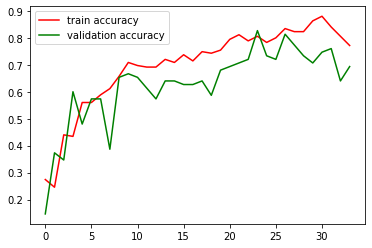

In [ ]:
plt.plot(my_mod.history['accuracy'],'r',label='train accuracy')
plt.plot(my_mod.history['val_accuracy'],'g',label='validation accuracy')
plt.legend()

In [ ]:
my_mod_train = my_mod.history['accuracy']
my_mod_test = my_mod.history['val_accuracy']

In [ ]:
score = pd.Series({'Model_Name':'Fine_Tuned Base Model','Train_Accuracy':my_mod.history['accuracy'][-1],'Train_Loss':my_mod.history['loss'][-1],'Validation_Accuracy':my_mod.history['val_accuracy'][-1],'Validation_Loss':my_mod.history['val_loss'][-1]})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Train_Accuracy,Train_Loss,Validation_Accuracy,Validation_Loss
0,Base,0.577143,0.965051,0.573333,0.723501
1,Fine_Tuned Base Model,0.771429,0.476307,0.693333,0.681174


- The accuracy has increased from previous model and also there is slight overfitting. 

### **Feature Extraction using Transfer Learning Base Model**

#### **MobileNet Network**

##### **MobileNet Architecture**

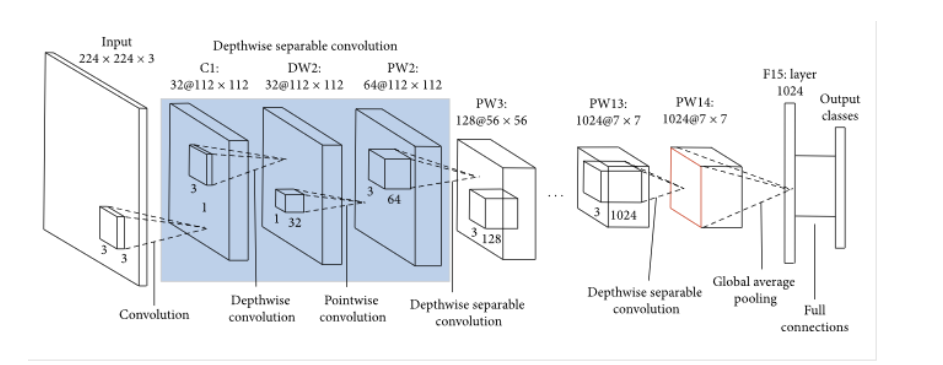

##### **MobileNet Base-Model**

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False)  #only convolution layer

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable=False
base_model.summary()  # freezing the convolution layer

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 64, 64, 32) 

In [ ]:
Transfer_model_mobileNet = tf.keras.Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(5, activation='softmax')
])

Transfer_model_mobileNet.summary()

Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout_488 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_370 (Dense)            (None, 64)                65600     
_________________________________________________________________
dropout_489 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_371 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_490 (Dropout)        (None, 64)             

In [ ]:
Transfer_model_mobileNet.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=0.02),metrics=['accuracy'])

In [ ]:
tl_model = Transfer_model_mobileNet.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=keras_callbacks)

Epoch 1/50
6/6 [==============================] - 3s 182ms/step - loss: 18.2581 - accuracy: 0.3200 - val_loss: 1.5124 - val_accuracy: 0.7600
Epoch 2/50
6/6 [==============================] - 0s 24ms/step - loss: 1.8185 - accuracy: 0.6743 - val_loss: 0.5577 - val_accuracy: 0.7200
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.6375 - accuracy: 0.7429 - val_loss: 0.3843 - val_accuracy: 0.7600
Epoch 4/50
6/6 [==============================] - 0s 23ms/step - loss: 0.5219 - accuracy: 0.7771 - val_loss: 0.4415 - val_accuracy: 0.7867
Epoch 5/50
6/6 [==============================] - 0s 23ms/step - loss: 0.3941 - accuracy: 0.8343 - val_loss: 0.3381 - val_accuracy: 0.8267
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 0.4706 - accuracy: 0.7771 - val_loss: 5.5048 - val_accuracy: 0.5467
Epoch 7/50
6/6 [==============================] - 0s 23ms/step - loss: 1.0002 - accuracy: 0.7657 - val_loss: 0.3470 - val_accuracy: 0.8133
Epoch 8/50
6/6 [=========

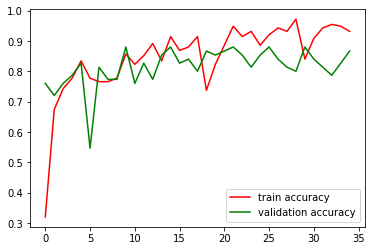

In [ ]:
plt.plot(tl_model.history['accuracy'],'r',label='train accuracy')
plt.plot(tl_model.history['val_accuracy'],'g',label='validation accuracy')
plt.legend()

In [ ]:
tl_model_train = tl_model.history['accuracy']
tl_model_test = tl_model.history['val_accuracy']

In [ ]:
score = pd.Series({'Model_Name':'TransferLearningModel(MobileNet)','Train_Accuracy':tl_model.history['accuracy'][-1],'Train_Loss':tl_model.history['loss'][-1],'Validation_Accuracy':tl_model.history['val_accuracy'][-1],'Validation_Loss':tl_model.history['val_loss'][-1]})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Train_Accuracy,Train_Loss,Validation_Accuracy,Validation_Loss
0,Base,0.577143,0.965051,0.573333,0.723501
1,Fine_Tuned Base Model,0.771429,0.476307,0.693333,0.681174
2,TransferLearningModel(MobileNet),0.931429,0.207971,0.866667,0.581530


- Accuaracy  is improved compared to previous models but still overfitting is existing.

##### **Tuning MobileNet**





In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=(128,128,3),include_top=False)

In [ ]:
base_model.trainable = False

In [ ]:
for layer in base_model.layers[71:]:
    layer.trainable = True
# last few layer of convolution layer is trained.

In [ ]:
Transfer_model_mobileNet_tuning = tf.keras.Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(5, activation='softmax')
])

Transfer_model_mobileNet_tuning.summary()

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dropout_494 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_376 (Dense)            (None, 64)                65600     
_________________________________________________________________
dropout_495 (Dropout)        (None, 64)                0         
_________________________________________________________________
dense_377 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_496 (Dropout)        (None, 64)             

In [ ]:
Transfer_model_mobileNet_tuning.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(lr=0.02),metrics=['accuracy'])

In [ ]:
tl_tuned = Transfer_model_mobileNet_tuning.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=keras_callbacks)

Epoch 1/50
6/6 [==============================] - 2s 115ms/step - loss: 16.9706 - accuracy: 0.3657 - val_loss: 1.7997 - val_accuracy: 0.4667
Epoch 2/50
6/6 [==============================] - 0s 29ms/step - loss: 1.1957 - accuracy: 0.5829 - val_loss: 0.4823 - val_accuracy: 0.7333
Epoch 3/50
6/6 [==============================] - 0s 26ms/step - loss: 0.5885 - accuracy: 0.7314 - val_loss: 0.7375 - val_accuracy: 0.7600
Epoch 4/50
6/6 [==============================] - 0s 25ms/step - loss: 0.6590 - accuracy: 0.7543 - val_loss: 0.6209 - val_accuracy: 0.7600
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 0.5441 - accuracy: 0.7829 - val_loss: 0.4961 - val_accuracy: 0.7733
Epoch 6/50
6/6 [==============================] - 0s 23ms/step - loss: 0.4174 - accuracy: 0.8000 - val_loss: 0.4205 - val_accuracy: 0.7733
Epoch 7/50
6/6 [==============================] - 0s 23ms/step - loss: 0.3719 - accuracy: 0.7943 - val_loss: 0.3770 - val_accuracy: 0.7733
Epoch 8/50
6/6 [=========

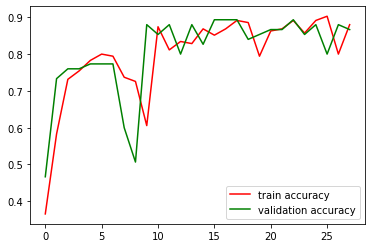

In [ ]:
plt.plot(tl_tuned.history['accuracy'],'r',label='train accuracy')
plt.plot(tl_tuned.history['val_accuracy'],'g',label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
tl_tuned_train = tl_tuned.history['accuracy']
tl_tuned_test = tl_tuned.history['val_accuracy']

In [ ]:
score = pd.Series({'Model_Name':'TransferLearningModelTuned(MobileNet)','Train_Accuracy':tl_tuned.history['accuracy'][-1],'Train_Loss':tl_tuned.history['loss'][-1],'Validation_Accuracy':tl_tuned.history['val_accuracy'][-1],'Validation_Loss':tl_tuned.history['val_loss'][-1]})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Train_Accuracy,Train_Loss,Validation_Accuracy,Validation_Loss
0,Base,0.577143,0.965051,0.573333,0.723501
1,Fine_Tuned Base Model,0.771429,0.476307,0.693333,0.681174
2,TransferLearningModel(MobileNet),0.931429,0.207971,0.866667,0.581530
3,TransferLearningModelTuned(MobileNet),0.880000,0.284598,0.866667,0.263302


- Accuracy is slightly reduced as compared to previous model however, overfitting is reduced largely.

#### **VGG-16**

##### **VGG-16 Architecture**

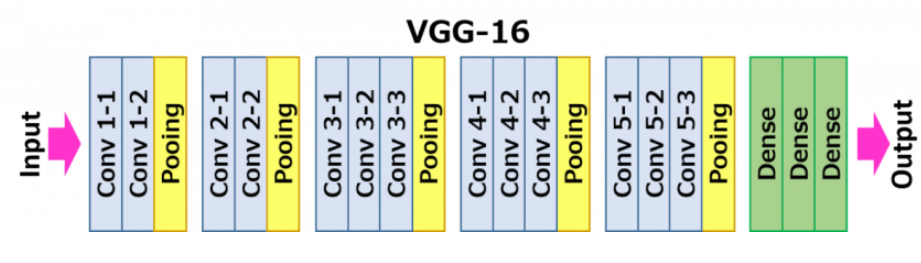

##### **VGG-16 Base Model**

In [ ]:
from keras.applications.vgg16 import VGG16
IMG_SHAPE = (128, 128, 3)
base_model_vgg = VGG16(input_shape=IMG_SHAPE, include_top=False,weights='imagenet')

 
base_model_vgg.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

In [ ]:
base_model_vgg.trainable = False  # Freezing the all the convolution layer

base_model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
Transfer_model_vgg = tf.keras.Sequential([
  base_model_vgg,
  GlobalAveragePooling2D(),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(5, activation='softmax')
])

In [ ]:
img_shape=(X_train.shape[0],128,128,3)
Transfer_model_vgg.build(img_shape)
Transfer_model_vgg.summary()

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (175, 4, 4, 512)          14714688  
_________________________________________________________________
global_average_pooling2d_3 ( (175, 512)                0         
_________________________________________________________________
dropout_497 (Dropout)        (175, 512)                0         
_________________________________________________________________
dense_379 (Dense)            (175, 64)                 32832     
_________________________________________________________________
dropout_498 (Dropout)        (175, 64)                 0         
_________________________________________________________________
dense_380 (Dense)            (175, 64)                 4160      
_________________________________________________________________
dropout_499 (Dropout)        (175, 64)              

In [ ]:
Transfer_model_vgg.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.02),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
tl_vgg = Transfer_model_vgg.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=keras_callbacks)

Epoch 1/50
6/6 [==============================] - 0s 78ms/step - loss: 0.3974 - accuracy: 0.8457 - val_loss: 0.4277 - val_accuracy: 0.8133
Epoch 2/50
6/6 [==============================] - 0s 60ms/step - loss: 0.7175 - accuracy: 0.8057 - val_loss: 0.3945 - val_accuracy: 0.8267
Epoch 3/50
6/6 [==============================] - 0s 59ms/step - loss: 0.4099 - accuracy: 0.8286 - val_loss: 0.3392 - val_accuracy: 0.8267
Epoch 4/50
6/6 [==============================] - 0s 60ms/step - loss: 0.5213 - accuracy: 0.7943 - val_loss: 0.3557 - val_accuracy: 0.8133
Epoch 5/50
6/6 [==============================] - 0s 60ms/step - loss: 0.3807 - accuracy: 0.8400 - val_loss: 0.4028 - val_accuracy: 0.8267
Epoch 6/50
6/6 [==============================] - 0s 60ms/step - loss: 0.3388 - accuracy: 0.8686 - val_loss: 0.4340 - val_accuracy: 0.8400
Epoch 7/50
6/6 [==============================] - 0s 60ms/step - loss: 0.4210 - accuracy: 0.8114 - val_loss: 0.4241 - val_accuracy: 0.8133
Epoch 8/50
6/6 [===========

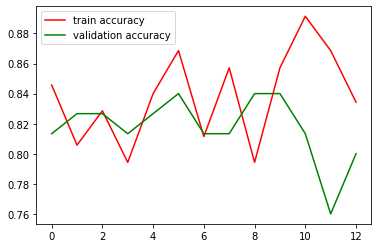

In [ ]:
plt.plot(tl_vgg.history['accuracy'],'r',label='train accuracy')
plt.plot(tl_vgg.history['val_accuracy'],'g',label='validation accuracy')
plt.legend()

In [ ]:
tl_vgg_train = tl_vgg.history['accuracy']
tl_vgg_test = tl_vgg.history['val_accuracy']

In [ ]:
score = pd.Series({'Model_Name':'TransferLearningModel(VGG-16)','Train_Accuracy':tl_vgg.history['accuracy'][-1],'Train_Loss':tl_vgg.history['loss'][-1],'Validation_Accuracy':tl_vgg.history['val_accuracy'][-1],'Validation_Loss':tl_vgg.history['val_loss'][-1]})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Train_Accuracy,Train_Loss,Validation_Accuracy,Validation_Loss
0,Base,0.577143,0.965051,0.573333,0.723501
1,Fine_Tuned Base Model,0.771429,0.476307,0.693333,0.681174
2,TransferLearningModel(MobileNet),0.931429,0.207971,0.866667,0.581530
3,TransferLearningModelTuned(MobileNet),0.880000,0.284598,0.866667,0.263302
4,TransferLearningModel(VGG-16),0.834286,0.460796,0.800000,0.411104


Accuracy is good and overfitting is also less. Let us try tuning the vgg-16 model

##### **Tuning VGG-16**

In [ ]:
from keras.applications.vgg16 import VGG16
IMG_SHAPE = (128, 128, 3)
base_model_vgg = VGG16(input_shape=IMG_SHAPE, include_top=False,weights='imagenet')

 
base_model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
base_model_vgg.trainable = False  # Freezing the all the convolution layer

In [ ]:
for layer in base_model_vgg.layers[11:]:
    layer.trainable=True
    
for layer in base_model_vgg.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f2e119e1490> False
<keras.layers.convolutional.Conv2D object at 0x7f2e119e1bd0> False
<keras.layers.convolutional.Conv2D object at 0x7f2e13c3ffd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2e119b3610> False
<keras.layers.convolutional.Conv2D object at 0x7f2e138212d0> False
<keras.layers.convolutional.Conv2D object at 0x7f2e119c1b90> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2e1386b310> False
<keras.layers.convolutional.Conv2D object at 0x7f2e119d4490> False
<keras.layers.convolutional.Conv2D object at 0x7f2e11a1a910> False
<keras.layers.convolutional.Conv2D object at 0x7f2e1196f910> False
<keras.layers.pooling.MaxPooling2D object at 0x7f2e1196fa10> False
<keras.layers.convolutional.Conv2D object at 0x7f2e119ca110> True
<keras.layers.convolutional.Conv2D object at 0x7f2e1197db90> True
<keras.layers.convolutional.Conv2D object at 0x7f2e11975710> True
<keras.layers.pooling.MaxPooling2D object at 0x7f2e13821ad0> Tr

In [ ]:
Transfer_model_vgg_tune = tf.keras.Sequential([
  base_model_vgg,
  GlobalAveragePooling2D(),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(64,activation='relu'),
  Dropout(0.2),
  Dense(5, activation='softmax')
])

In [ ]:
Transfer_model_vgg_tune.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.02),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
tl_vgg_tune = Transfer_model_vgg_tune.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=keras_callbacks)

Epoch 1/50
6/6 [==============================] - 1s 114ms/step - loss: 5.6475 - accuracy: 0.2971 - val_loss: 1.2518 - val_accuracy: 0.4933
Epoch 2/50
6/6 [==============================] - 0s 61ms/step - loss: 1.2106 - accuracy: 0.4457 - val_loss: 1.0677 - val_accuracy: 0.4533
Epoch 3/50
6/6 [==============================] - 0s 60ms/step - loss: 0.8950 - accuracy: 0.5543 - val_loss: 0.6592 - val_accuracy: 0.6267
Epoch 4/50
6/6 [==============================] - 0s 60ms/step - loss: 0.6642 - accuracy: 0.6857 - val_loss: 0.6216 - val_accuracy: 0.7600
Epoch 5/50
6/6 [==============================] - 0s 60ms/step - loss: 0.6660 - accuracy: 0.7086 - val_loss: 0.4752 - val_accuracy: 0.8267
Epoch 6/50
6/6 [==============================] - 0s 60ms/step - loss: 0.5859 - accuracy: 0.7257 - val_loss: 0.4999 - val_accuracy: 0.7200
Epoch 7/50
6/6 [==============================] - 0s 60ms/step - loss: 0.5291 - accuracy: 0.7086 - val_loss: 0.4673 - val_accuracy: 0.7467
Epoch 8/50
6/6 [==========

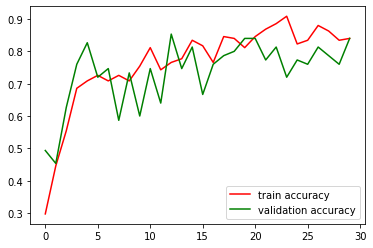

In [ ]:
plt.plot(tl_vgg_tune.history['accuracy'],'r',label='train accuracy')
plt.plot(tl_vgg_tune.history['val_accuracy'],'g',label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
tl_vgg_tune_train = tl_vgg_tune.history['accuracy']
tl_vgg_tune_test = tl_vgg_tune.history['val_accuracy']

In [ ]:
score = pd.Series({'Model_Name':'TransferLearningModelTuned(VGG-16)','Train_Accuracy':tl_vgg_tune.history['accuracy'][-1],'Train_Loss':tl_vgg_tune.history['loss'][-1],'Validation_Accuracy':tl_vgg_tune.history['val_accuracy'][-1],'Validation_Loss':tl_vgg_tune.history['val_loss'][-1]})
score_card=score_card.append(score,ignore_index=True)
score_card

,Model_Name,Train_Accuracy,Train_Loss,Validation_Accuracy,Validation_Loss
0,Base,0.577143,0.965051,0.573333,0.723501
1,Fine_Tuned Base Model,0.771429,0.476307,0.693333,0.681174
2,TransferLearningModel(MobileNet),0.931429,0.207971,0.866667,0.581530
3,TransferLearningModelTuned(MobileNet),0.880000,0.284598,0.866667,0.263302
4,TransferLearningModel(VGG-16),0.834286,0.460796,0.800000,0.411104
5,TransferLearningModelTuned(VGG-16),0.840000,0.360036,0.840000,0.381398


The accuracy of the tuned vgg16 model is good and there is no overfitting at all.

# **Conclusion**

In [ ]:
score_card

,Model_Name,Train_Accuracy,Train_Loss,Validation_Accuracy,Validation_Loss
0,Base,0.577143,0.965051,0.573333,0.723501
1,Fine_Tuned Base Model,0.771429,0.476307,0.693333,0.681174
2,TransferLearningModel(MobileNet),0.931429,0.207971,0.866667,0.581530
3,TransferLearningModelTuned(MobileNet),0.880000,0.284598,0.866667,0.263302
4,TransferLearningModel(VGG-16),0.834286,0.460796,0.800000,0.411104
5,TransferLearningModelTuned(VGG-16),0.840000,0.360036,0.840000,0.381398


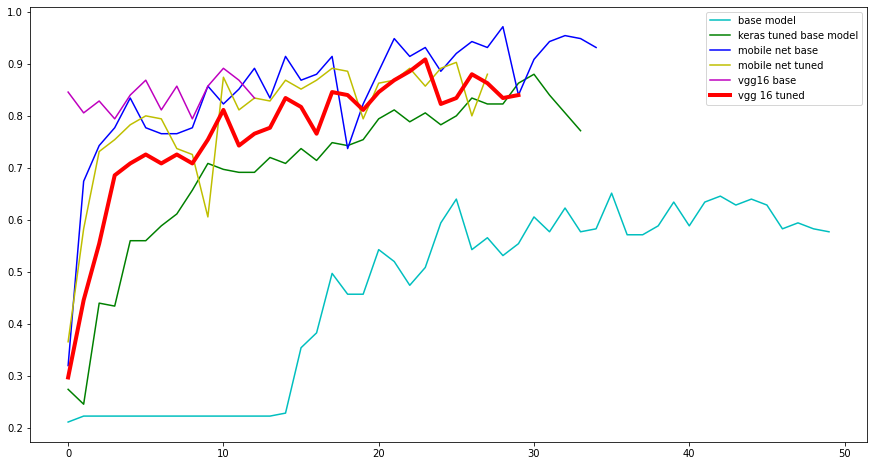

In [ ]:
plt.rcParams['figure.figsize']=[15,8]
plt.plot(base_train,'c',label='base model')
plt.plot(my_mod_train,'g',label='keras tuned base model')
plt.plot(tl_model_train,'b',label='mobile net base')
plt.plot(tl_tuned_train,'y',label='mobile net tuned')
plt.plot(tl_vgg_train,'m',label='vgg16 base')
plt.plot(tl_vgg_tune_train,'r',linewidth=4,alpha=1,label='vgg 16 tuned')
plt.legend(loc='best')
plt.show()

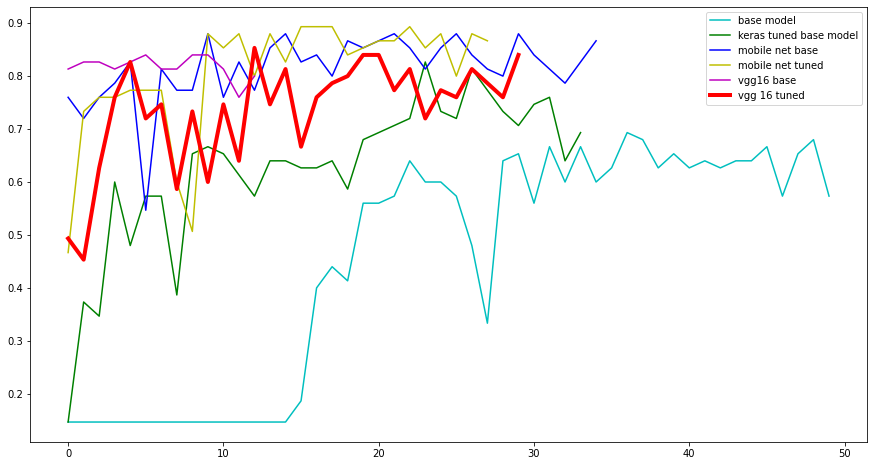

In [ ]:
plt.plot(base_test,'c',label='base model')
plt.plot(my_mod_test,'g',label='keras tuned base model')
plt.plot(tl_model_test,'b',label='mobile net base')
plt.plot(tl_tuned_test,'y',label='mobile net tuned')
plt.plot(tl_vgg_test,'m',label='vgg16 base')
plt.plot(tl_vgg_tune_test,'r',linewidth=4,alpha=1,label='vgg 16 tuned')
plt.legend()
plt.show()

From the score_card we can see the VGG-16 with some of the convolution layer and dense layer tuned is giving good accuracy.Even tho Mobilenet is giving highest accuracy but overfitting exist.VGG-16 tuned model is best model as their is no overfitting.For this model the weights are saved which can be used for future project.

In [ ]:
#Saving the weights of the best model
Transfer_model_vgg_tune.save_weights('/content/drive/MyDrive/Project/vgg16weights1.h5')

# **Predicting Label for a Sample Image of Best Model**

In [ ]:
# Vgg16 tuned(Best model)
print(Transfer_model_vgg_tune.predict(X_test).round()[55])
print(y_test[55])

[0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0.]


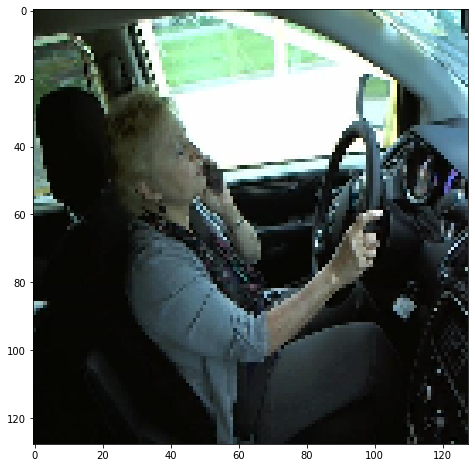

In [ ]:
plt.imshow(X_test[55])
plt.show()

# **Future Scope**

- Process the video to get the frame per second and from each frame getting the Region of Interest using Yolo.
- According to research most of drowsiness case pertain to people in the age group of 15-25 especially the male so the drivers assistancesystem can take extra precaution for such condition.
- Checking of lane changing with repect to drowiness or distraction.
- Detecting the duration of driving without any break.